<div style='color:rgb(80,80,80);font-size:10pt;'>
    NOTICE:
    This project includes material released under the Apache 2.0 open source license that has been edited from its original form.
    A
    <a href='NOTICE.txt'; style='color:rgb(80,80,80);size:10pt;'>
        notice
    </a> 
    and complete 
    <a href='LICENSE.txt'; style='color:rgb(80,80,80);size:10pt;'>
        license
    </a> 
    are available in the root directory of the repository containing this notebook. The 
    <a href='reference/amex-competition-metric-python.ipynb'; style='color:rgb(80,80,80);size:10pt;'>
        unedited source material
    </a>
    is included in the 
    <a href='reference/'; style='color:rgb(80,80,80);size:10pt;'>
        reference directory
    </a> of this repository.
</div>

Nicholas Brower<br>
Springboard DSCT May 2022<br>
Capstone 2

<h1> American Express Default Prediction</h1>

<h2 style='background-color:#006FCF; color:white; padding:7px;'> Data wrangling </h2>

This notebook documents the process of loading data and generating a relational database for the 2022 American Express default prediction Kaggle competition dataset. This competition provides three csv files. The train_data.csv file includes anonymized timseries data per customer for each of its features. The train_labels.csv file provides target feature classifications indicating which customers in train_data.csv defaulted. The test_data.csv file includes unlabeled data of the same format and structure as train_data.csv. A default event occurs when a customer fails to pay a due amount within 120 days of the end of their last credit card statement. <br><br>
This project aims to build a predictive model of the binary target feature in train_labels using the information provided in train_data. Predictions will be generated for the customers in test_data. Predictions will be scored using the metric presented in the <a href='https://www.kaggle.com/code/inversion/amex-competition-metric-python'> notebook file</a> available through the <a href='https://www.kaggle.com/competitions/amex-default-prediction/overview/evaluation'> evaluation tab</a> of the competition landing page. As described on the competition's <a href='https://www.kaggle.com/competitions/amex-default-prediction/data'> data page</a>, the provided dataset subsamples the negative class of the target feature at 5%. Consequently, the scoring metric assigns weights of 20 and 1 for the negative class and positive class, respectively.<br><br>
The notebooks contained in this repository allow this model to be recreated provided the following starting conditions are met: The competition data has been unpacked and stored in the relative path 'data/raw/'. A sql database has been initialized, and a pyodbc connection string has been assigned to the variable CONNECTION_STRING in a sql_db_connection.py package.

<h3 style='padding:5px;'> Contents </h3>
<div style='font-size: 5px; color:#FDB92D; background-color:#FDB92D;'>.</div>

<table style='width:100%;'>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'><b>1.</b></div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'><b>Infrastructure</b></div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>1.1.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Modules and packages </div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>1.2.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Classes and constants </div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>1.3.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Paths</div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>1.3.1.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Files and folders</div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:20px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>1.3.2.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:20px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Connections</div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'><b>2.</b></div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'><b>Loading</b></div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>2.1.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Create project files </div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>2.2.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Inspect csv files </div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>2.3.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Initialize feature map </div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>2.4.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Load and pickle DataFrames </div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:20px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>2.5.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:20px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Summarize shape and structure </div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'><b>3.</b></div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'><b>Database creation</b></div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>3.1.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Setup </div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>3.1.1.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Create project directories </div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>3.1.2.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Populate type map </div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>3.2.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Generate table statements </div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>3.2.1.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Create table statements </div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>3.2.2.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Bulk insert statements </div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>3.3.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Generate views </div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>3.3.1.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Numeric feature delta </div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>3.3.1.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Numeric feature aggregates </div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>3.3.2.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Categorical subfeatures</div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:20px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>3.4.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:20px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Execute statements </div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'><b>4.</b></div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'><b>Dataset and features</b></div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>4.1.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Categorize features</div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>4.2.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Summarize features</div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>4.3.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Measure and clean features</div></td>
</tr>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>4.3.1.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Remove duplicates</div></td>
</tr>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>4.3.2.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Visualize distributions</div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>4.3.3.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Calculate null percentage</div></td>
</tr>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>4.3.4.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Approximate data height</div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>4.3.5.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Estimate target class distinctions</div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>4.4.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Sort features by target correlation</div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>4.5.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Compare train and test data</div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>4.6.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Calculate percentiles and std deviation</div></td>
</tr>
<tr style='padding:0px; max-height:100%;'>
	<td width='10%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>4.7.</div></td>
	<td  width='90%'; style='padding-top:2px; padding-bottom:2px; padding-right: 50px; text-align: left; max-height:100%;'>
		<div style='max-height:100%;'>Print feature summaries</div></td>
</tr>
</table>

<h3 style='background-color:rgba(185, 191, 209, 0.2); padding: 7px'> 1. Infrastructure</h3>

<h4> 1.1. Modules and Packages </h4>

The project package defines dataclasses, functions, and constants to organize, access, and interpret data used in this project. The sql_pipeline package defines functions used to generate sql statements. These statements are used to generate a local database from the provided csv files. The eda_pipeline package defines constants, classes, and functions used to facilitate exploratory data analysis. The amex_default_metadata package contains information about the Kaggle competition and its datasets. All non-standard packages can be found in the root directory of the repository containing this notebook. The amex_evaluation_metric package is constructed from licensed material as described in the NOTICE section of this notebook's header.<br><br>

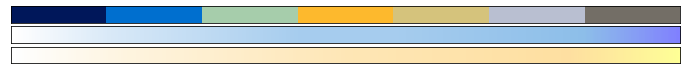

In [1]:
from project import *
from eda_pipeline import *
from sql_pipeline import *
from sql_db_setup import *
from itertools import chain
import datetime
import pickle
from collections import Counter
from pprint import pprint, pformat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes
import pandas as pd
from scipy.stats import mannwhitneyu, normaltest
import amex_evaluation_metric
from amex_default_metadata import FEATURE_CATEGORIES, CATEGORICAL_FEATURES
from amex_default_metadata import SQL_DB_META

#### 1.2. Classes and constants

Some classes and constants are inherited from packges imported in section 1.1.

In [2]:
DB_NAME = 'amex_default'
SCHEMA = 'dbo'
NB_PATH = 'data/working/01_wrangling/'

#### 1.3. Paths

Ensure the starting conditions described in this notebook's introduction are met.

#### 1.3.1. Files and folders

Assert required files and folders exist at their respective relative paths.

In [3]:
for relative_path in ['data/raw/', 'data/working/sql/', NB_PATH]:
    assert path.exists(relative_path)
for required_file in ['train_data.csv', 'train_labels.csv', 'test_data.csv']:
    assert path.exists(f'data/raw/{required_file}')

#### 1.3.2. Connections

Assert a compatible database, schema, and connection exist. Compare the DB_NAME constant to the result of selecting catalog_name from information_schema.schemata where schema matches the SCHEMA constant. Print the return object of a statement selecting these values.

In [4]:
assert check_db(schema=SCHEMA) == DB_NAME
print(sql_query(
    f"SELECT 'database name'='{DB_NAME}', 'schema'='{SCHEMA}'"
))

  database name schema
0  amex_default    dbo


<h3 style='background-color:rgba(185, 191, 209, 0.3); padding: 7px'> 2. Loading</h3>

Perform data collection and data definition tasks.

#### 2.1. Create project files

Create ProjectFile objects for the csv files provided by American Express. Store headers as lists of strings.

In [5]:
train_data_raw = ProjectFile('train data', 'train_data.csv', RAW)
train_labels_raw = ProjectFile('train labels', 'train_labels.csv', RAW)
test_data_raw = ProjectFile('test data', 'test_data.csv', RAW)

In [6]:
train_data_cols = train_data_raw.header_to_list()
train_labels_cols = train_labels_raw.header_to_list()
test_data_cols = test_data_raw.header_to_list()

#### 2.2. Inspect csv files

Inspect train_data.csv

In [7]:
inspect_csv(train_data_raw)

train data:
relative path: data/raw/train_data.csv
190 columns

header:   customer_ID, S_2, P_2, D_39, B_1, B_2, R_1, S_3, D_41, B_3...

possible date columns: 
    S_2 (inferred from "2017-03-09"), B_31 (inferred from "0001")

row 1: (10 elements; elements limited to 10 characters)
-------------------------------------------------------------------------------
0000099d6b, 2017-03-09, 0.93846871, 0.00173333, 0.00872445, 1.00683823,
0.00922772, 0.12403515, 0.00877113, 0.00470924


Assign the relevant date format string for S_2 to a constant

In [8]:
DATE_FORMAT = '%Y-%m-%d'

Inspect train_labels.csv

In [9]:
inspect_csv(train_labels_raw)

train labels:
relative path: data/raw/train_labels.csv
2 columns

header:   customer_ID, target


row 1:
-------------------------------------------------------------------------------
0000099d6b, 0


#### 2.3. Initialize feature map<br>
Initialize a feature type map using provided metadata and information gathered from initial csv inspection.

In [10]:
feature_map = {
    'identifier': ['customer_ID'], 
    'datetime': ['S_2'], 
    'categorical': CATEGORICAL_FEATURES,
    'numeric': [],
    'target': ['target']
}

#### 2.4. Load and pickle DataFrames<br>
Create ProjectData objects to load and pickle raw data. Add pickle file extensions to a local .gitignore file.

In [11]:
train_data, train_labels, test_data = [
    ProjectData(*proj_file.to_data(pd.DataFrame))
    for proj_file in [train_data_raw, train_labels_raw, test_data_raw]
]
test_df = test_data.load()
train_df = train_data.load()
labels_df = train_labels.load()
test_df.attrs['name'] = 'test data'
train_df.attrs['name'] = 'train data'
labels_df.attrs['name'] = 'train labels'

In [12]:
for pickle_extension in ['*.pickle', '*.pkl']:
    git_ignore(pickle_extension)

#### 2.5. Summarize shape and structure<br>
Check unique datatypes of the DataFrame created from the train_data csv file.

In [13]:
print(set(train_df[col].dtype for col in train_df.columns))

{dtype('int64'), dtype('float64'), dtype('O')}


Convert known datetime column to appropriate type for train and test DataFrames.

In [14]:
train_df.loc[:, 'S_2'] = train_df.loc[:, 'S_2'].astype(
    np.datetime64).dt.date
test_df.loc[:, 'S_2'] = test_df.loc[:, 'S_2'].astype(
    np.datetime64).dt.date

Inspect shape and basic attributes of dataframes generated from each csv file.

In [15]:
print(df_summary(train_df, 'customer_ID', 'S_2'))
print(df_summary(test_df, 'customer_ID', 'S_2'))
print(df_summary(labels_df, 'customer_ID'))

train data
total records                  5,531,451
total columns                        190
null percent                      15.31%
total invididuals                458,913
start date                    2017-03-01
end date                      2018-03-31

test data
total records                 11,363,762
total columns                        190
null percent                      14.89%
total invididuals                924,621
start date                    2018-04-01
end date                      2019-10-31

train labels
total records                    458,913
total columns                          2
null percent                       0.00%
total invididuals                458,913



<h3 style='background-color:rgba(185, 191, 209, 0.2); padding: 7px'> 3. Database creation </h3>

Perform data organization and data definition tasks.

Create a local relational database using the provided data. This notebook generates sql statements to create and populate tables within an existing database. The name of this database is stored in the constant DB_NAME, and connection details are imported from the sql_db_connection package. No effort has been made to render statements in implementation-agnostic syntax. Statements are writtten for SQL Server 2019.

#### 3.1. Setup

#### 3.1.1. Create project directories

Add folders to organize table generation statements and views by source file.

In [16]:
for table in ['train_data', 'train_labels', 'test_data']:
    table_folder = f'{WORKING}sql/{table}/'
    if not path.exists(table_folder):
        makedirs(table_folder)

#### 3.1.2. Populate type map

Explore feature types. Assign uncategorized features to appropriate types. Print populated feature type map.

In [17]:
for col in train_df.columns:
    if any([col in features for features in feature_map.values()]):
        continue
    if pd.api.types.is_numeric_dtype(train_df[col]):
        feature_map['numeric'].append(col)
for datatype in feature_map:
    print(
        f'{datatype} ({len(feature_map[datatype])})\n{hr("-")}'
        + f'{ffill(", ".join(sorted(feature_map[datatype])), num_tabs=1)}\n\n'
    )

identifier (1)
-------------------------------------------------------------------------------
    customer_ID


datetime (1)
-------------------------------------------------------------------------------
    S_2


categorical (11)
-------------------------------------------------------------------------------
    B_30, B_38, D_114, D_116, D_117, D_120, D_126, D_63, D_64, D_66, D_68


numeric (177)
-------------------------------------------------------------------------------
    B_1, B_10, B_11, B_12, B_13, B_14, B_15, B_16, B_17, B_18, B_19, B_2, B_20,
    B_21, B_22, B_23, B_24, B_25, B_26, B_27, B_28, B_29, B_3, B_31, B_32,
    B_33, B_36, B_37, B_39, B_4, B_40, B_41, B_42, B_5, B_6, B_7, B_8, B_9,
    D_102, D_103, D_104, D_105, D_106, D_107, D_108, D_109, D_110, D_111,
    D_112, D_113, D_115, D_118, D_119, D_121, D_122, D_123, D_124, D_125,
    D_127, D_128, D_129, D_130, D_131, D_132, D_133, D_134, D_135, D_136,
    D_137, D_138, D_139, D_140, D_141, D_142, D_143, D_144, D_14

Establish target feature name and class balance.

In [18]:
print(labels_df.head(2))

                                         customer_ID  target
0  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...       0
1  00000fd6641609c6ece5454664794f0340ad84dddce9a2...       0


In [19]:
_ = {0: '0:'.ljust(7) + 'no default', 1: '1:'.ljust(7) + 'default'}
print('val'.ljust(7) + f'label\n{hr("-", 30, 0)}')
print(((
    100 * labels_df.target.value_counts(normalize=True).round(4)
).astype(str).rename(index=_) + '%').to_string())

val    label
------------------------------
0:     no default    74.11%
1:     default       25.89%


Inspect unique values by categorical feature. <br><br>
A list of categorical features was provided by American Express via the data tab of this competition's <a href='https://www.kaggle.com/competitions/amex-default-prediction/data'>Kaggle page</a>. This list is assigned to the CATEGORICAL_FEATURES constant in the amex_default_metadata package imported in section 1.1.

In [20]:
categorical_features = {
    feature: train_df[feature].dropna().unique()
    for feature in CATEGORICAL_FEATURES
}
for feature in categorical_features:
    if not pd.api.types.is_numeric_dtype(train_df[feature].dtype):
        categorical_features[feature] = [
            f"'{_}'" for _ in categorical_features[feature]
        ]
for feature, categories in categorical_features.items():
    print(f'{feature}:'.ljust(8) + f'{", ".join(map(str, categories))}')

B_30:   0.0, 2.0, 1.0
B_38:   2.0, 1.0, 3.0, 5.0, 6.0, 7.0, 4.0
D_114:  1.0, 0.0
D_116:  0.0, 1.0
D_117:  4.0, -1.0, 6.0, 2.0, 1.0, 3.0, 5.0
D_120:  0.0, 1.0
D_126:  1.0, 0.0, -1.0
D_63:   'CR', 'CO', 'CL', 'XZ', 'XM', 'XL'
D_64:   'O', 'R', 'U', '-1'
D_66:   1.0, 0.0
D_68:   6.0, 2.0, 3.0, 5.0, 4.0, 0.0, 1.0


Determine maximum length of values for each column containing strings. Assign sql type accordingly.

In [21]:
print(df_max_str_lens(train_df))

customer_ID:   64
S_2:           10
D_63:          2
D_64:          3


In [22]:
feature_sql_types = {
    'customer_ID': ['VARCHAR(80)', 'NOT NULL'], 
    'D_63': ['VARCHAR(20)', 'NULL'],
    'D_64': ['VARCHAR(20)', 'NULL'],
    'target': ['INT', 'NULL']
}
for feature in chain.from_iterable(feature_map.values()):
    if feature in feature_sql_types:
        continue
    else:
        feature_sql_types[feature] = ['FLOAT', 'NULL']

#### 3.2. Generate table statements

#### 3.2.1 Create table statements<br>
Genereate CREATE TABLE statements for the three csv files.

In [23]:
create_table_files = zip(
    ['train_data', 'train_labels', 'test_data'],
    [train_data_cols, train_labels_cols, test_data_cols]
)
create_table_files = {
    table: 
    csv_create_table(
        table, cols, feature_sql_types, DB_NAME
    ) for table, cols in create_table_files
}
for table, statement in create_table_files.items():
    filename = f'create_table__{table}.sql'
    table_folder = f'{WORKING}sql/{table}/'
    with open(table_folder + filename, 'w') as sql_file:
        sql_file.write(statement)

#### 3.2.2. Generate bulk insert statements<br>
Generate BULK INSERT statements to populate tables.

In [24]:
for raw_file in (train_data_raw, train_labels_raw, test_data_raw):
    table_folder = f'{WORKING}sql/{raw_file.stem}/'
    filename = f'bulk_insert__{raw_file.stem}.sql'
    abs_path = (
        f'{path.dirname(path.abspath(raw_file.path_to_file))}\\' 
        + f'{raw_file.filename}'
    )
    bulk_insert_file = '\n'.join(_[8:] for _ in f'''
        USE [amex_default]
        GO
        BULK INSERT [dbo].[{raw_file.stem}]
            FROM '{abs_path}'
            WITH (
                FIELDTERMINATOR = ',', 
            ROWTERMINATOR = '0x0a',
            FIRSTROW = 2,
            KEEPNULLS
        )
        ;'''.split('\n'))
    with open(table_folder + filename, 'w') as sql_file:
        sql_file.write(bulk_insert_file)
    git_ignore(table_folder + filename)

#### 3.3. Generate views

Generate CREATE VIEW statements for numeric and categorical features to facilitate exploratory data analysis and feature engineering. The aggregates calculated per numeric feature are mean, minimum, maximum, range (maximum - minimum), sum, non-null count, first, last, mean delta, maximum delta, minimum delta, delta per day, and span (total days between first and last observation for this feature). The generated views are not sorted or indexed. <br><br>

To improve performance at the cost of increased disk space, tables may be created instead of views by removing the create_view argument and passsing True to the create_table argument of the timeseries_feature_aggregates and categorical_subfeatures functions.

#### 3.3.1 Generate numeric feature aggregates<br>
Generate CREATE VIEW statements for numeric feature aggregates by customer_ID using the timeseries_feature_aggregates function imported as part of the sql_db_setup package.

In [25]:
create_numeric_agg_files = {table: {
    col: [
        f'create_view__{table}_{col}_agg.sql',
        timeseries_feature_aggregates(
            id_col='customer_ID', datetime_col='S_2', col=col, 
            col_table=table, create_view=True
        )
    ] for col in feature_map['numeric']
} for table in ('train_data', 'test_data')}
for table, col_elements in create_numeric_agg_files.items():
    create_agg_views = ''
    create_all_path = f'{WORKING}sql/{table}/create_agg_views.sql'
    num_agg_path = f'{WORKING}sql/{table}/views/numeric_aggregates/'
    if not path.exists(num_agg_path):
        makedirs(num_agg_path)
    for filename, statement in col_elements.values():
        create_agg_views = create_agg_views + '\nGO\n' + statement
        with open(f'{num_agg_path}{filename}', 'w') as sql_file:
            sql_file.write(statement)
    with open(create_all_path, 'w') as create_all_file:
        create_all_file.write(create_agg_views)

#### 3.3.2. Generate categorical subfeatures<br>

Categorical features are not static for this dataset; a customer's value for a particular categorical feature may change between observation dates.<br><br>
Instead of traditional dummy features, a percentage of total values is calculated for each category of a categorical feature. Each subfeature corresponds to a category of its source feature. Each subfeature records the number of times a customer has this categorical value in the source feature divided by the total number of non-null values that customer has in the source feature.<br><br>

Generate categorical feature keys by enumerating the sorted values of a categorical feature. <br><br>
For an abritary feature x_2 with possible values A, B, and C, the subfeatures x_2_0, x_2_1, and x_2_2 are created. The categorical_feature_keys dictionary maps subfeature suffixes to corresponding values in the original data. The resultant dictionary for feature x_2 would be: <br>

    {x_2: {0: A, 1,: B, 2: c} }

In [26]:
categorical_feature_keys = {
    feature: dict(enumerate(sorted(categories)))
    for feature, categories in categorical_features.items()
}

Generate CREATE VIEW statements for categorical subfeatures.

In [27]:
create_categorical_subfeatures = {table: {
    feature: [
        f'create_subfeatures__{table}_{feature}_cat.sql',
        categorical_subfeatures(
            id_col='customer_ID', col=feature, table=table, 
            categories=categories, create_view=True
        )
    ]
    for feature, categories in categorical_feature_keys.items()
} for table in ('train_data', 'test_data')}
for table, col_elements in create_categorical_subfeatures.items():
    create_cat_views = ''
    create_all_path = f'{WORKING}sql/{table}/create_cat_views.sql'
    cat_sub_path = f'{WORKING}sql/{table}/views/categorical_subfeatures/'
    if not path.exists(cat_sub_path):
        makedirs(cat_sub_path)
    for filename, statement in col_elements.values():
        create_cat_views = create_cat_views + '\nGO\n' + statement
        with open(f'{cat_sub_path}{filename}', 'w') as sql_file:
            sql_file.write(statement)
    with open(create_all_path, 'w') as create_all_file:
        create_all_file.write(create_cat_views)

#### 3.1. Execute statements

Create tables

In [28]:
tables = (
    sql_query(
     'SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES'
    ).TABLE_NAME.values
)
for table in ['train_data', 'test_data', 'train_labels']:
    tbl_path = f'{WORKING}/sql/{table}/create_table__{table}.sql'
    blk_path = f'{WORKING}/sql/{table}/bulk_insert__{table}.sql'
    if table not in tables:
        with open(tbl_path) as create_statement:
            sql_exec_w(create_statement)
        with open(blk_path) as insert_statement:
            sql_exec_w(insert_statement)

Check database

In [29]:
for table in ['train_data', 'train_labels', 'test_data']:
    print(f'{table}:\n', str(int(sql_query(
        f'''
        SELECT COUNT(COLUMN_NAME) AS cols FROM INFORMATION_SCHEMA.COLUMNS 
        WHERE TABLE_NAME='{table}'
        ;'''
    ).cols.values[0])) + ' columns')
    print(f" {sql_query(f'SELECT COUNT (*) AS c FROM {table}').c.values[0]:,.0f}"
          + " records\n")

train_data:
 190 columns
 5,531,451 records

train_labels:
 2 columns
 458,913 records

test_data:
 190 columns
 11,363,762 records



Create numeric feature aggregate and categorical subfeature views for train_data

In [30]:
for table, col_elements in create_categorical_subfeatures.items():
    if table == 'test_data':
        continue
    folder = f'{WORKING}sql/{table}/views/categorical_subfeatures/'
    for feature, view_elements in col_elements.items():
        if f'{table}_{feature}_cat' not in tables:
            filename, stmt = view_elements
            with open(f'{folder}{filename}') as sql_stmt:
                sql_exec_w(sql_stmt.read())
for table, col_elements in create_numeric_agg_files.items():
    if table == 'test_data':
        continue
    folder = f'{WORKING}sql/{table}/views/numeric_aggregates/'
    for feature, view_elements in col_elements.items():
        if f'{table}_{feature}_agg' not in tables:
            filename, stmt = view_elements
            with open(f'{folder}{filename}') as sql_stmt:
                sql_exec_w(sql_stmt.read())


<h3 style='background-color:rgba(185, 191, 209, 0.2); padding: 7px'> 4. Dataset and features </h3>

#### 4.1. Categorize features

As described on its <a href='https://www.kaggle.com/competitions/amex-default-prediction/data'>Kaggle page</a>, this dataset consists of aggregated anonymized profile features per customer per statement date. Feature naming conventions indicate the type of variable measured, with the first letter of each feature name corresponding to a category using the following pattern:

    D_* = Delinquency variables
    S_* = Spend variables
    P_* = Payment variables
    B_* = Balance variables
    R_* = Risk variables

Create a dictionary of feature categories using the provided list.

In [31]:
feature_categories = {
    'D': 'delinquency', 'S': 'spend', 'P': 'payment', 'B': 'balance', 
    'R': 'risk'
}

Assign the total number of observerd individuals in train_data to a variable for use in later calculations.

In [32]:
num_train_customers = len(labels_df.customer_ID.unique())
print(f'train_data contains observations for {num_train_customers:,} individuals')

train_data contains observations for 458,913 individuals


Create a nested dictionary of features and their attributes that may be used to perform exploratory data analysis and develop predictive models.

In [33]:
train_features = PyProjectFile(name='train_features', directory=NB_PATH)

In [34]:
if 'add features and types' not in train_features.log:
    for feature in feature_map['categorical']:
        train_features.data[feature] = {
            'f_type': 'categorical', 'category': feature_categories[feature[0]]
        }
        if pd.api.types.is_numeric_dtype(categorical_features[feature][0]):
            train_features.data[feature]['d_type'] = np.double
            train_features.data[feature]['sql_type'] = 'FLOAT'
        else:
            train_features.data[feature]['d_type'] = str
            train_features.data[feature]['sql_type'] = 'VARCHAR(20)'
    for feature in feature_map['numeric']:
        train_features.data[feature] = {
            'f_type': 'numeric', 'category': feature_categories[feature[0]], 
            'd_type': np.double, 'sql_type': 'FLOAT'
        }
    train_features.add_to_log('add features and types')
    train_features.save

In [35]:
numeric_features = [
    feature for feature, details in train_features.data.items() 
    if details['f_type']=='numeric'
]
numeric_features = sorted(
    numeric_features, key = lambda item: [
        item[0], len(item[2:]), item[2:]
    ]
)

#### 4.2 Summarize features

Populate the train_features dictionary with feature details and summary statistics to inform imputation, feature selection, and feature engineering.

In [36]:
if 'add null percentage' not in train_features.log:
    for feature in train_features.data:
        train_features.data[feature]['null percent'] = null_pct(
            feature, id_col='customer_ID', table='train_data', 
            id_count=num_train_customers
        )
    train_features.add_to_log('add null percentage')
    train_features.save
if 'add target correlation by aggregate' not in train_features.log:
    for feature in train_features.data:
        if train_features[feature]['f_type'] == 'numeric':
            train_features[feature]['target correlation by aggregate'] = (
                numeric_aggs_corr(feature, 'customer_ID')
            )
    train_features.add_to_log('add target correlation by aggregate')
    train_features.save

For each numeric feature, determine which aggregate has the highest correlation with the target feature. Print the number of features for which each aggregate type is determined to have this maximum correlation.

In [290]:
aggs_w_highest_corr = {
    feature:
    max([
        (agg, corr) for agg, corr 
        in details['target correlation by aggregate'].items()
    ], key = lambda t: abs(t[1]))[0]
    for feature, details in train_features.data.items()
    if details['f_type'] == 'numeric'
}
print('aggregate'.ljust(12) + 'features'.rjust(12) + f'\n{hr("-", 24, newline=False)}')
for agg, count in Counter(aggs_w_highest_corr.values()).items():
    print(f'{agg}:'.ljust(12) + f'{count}'.rjust(12))

aggregate       features
------------------------
last:                 35
max:                  36
delta_max:            10
mean:                 13
first:                 2
span:                 36
min:                  10
count:                15
delta_min:             3
sum:                  14
range:                 3


Feature span records the number of days between the first and last non-null values for each customer_ID. Features with span as the most correlated aggregate will require closer inspection.

Using calculations performed in the previous two steps, add additional information per feature.<br><br>
While iterating through train_features, calculate summary statistics for categorical subfeatures. Calculate summary statistics for numeric features, aggregating time series data per customer using a list of aggregates determined using information gathered in the previous cell.

In [38]:
if 'add summary statistics' not in train_features.log:
    for feature, details in train_features.data.items():
        if details['f_type'] == 'numeric':
            aggs_to_summarize = ['max', 'last', 'mean', 'sum']
            highest_agg_corr = aggs_w_highest_corr[feature]
            if highest_agg_corr not in aggs_to_summarize:
                aggs_to_summarize.append(highest_agg_corr)
            train_features.data[feature]['summary'] = train_col_summary(
                col=feature, id_col='customer_id', 
                target_categories={'default': 1, 'no default': 0},
                aggs_to_summarize=aggs_to_summarize
            )
        if details['f_type'] == 'categorical':
            train_features.data[feature]['subfeatures'] = {
                f'{feature}_{key}': {f'{feature} value': value, 'key': key}
                for key, value in categorical_feature_keys[feature].items()
            }
            for subfeature in train_features.data[feature]['subfeatures']:
                train_features.data[feature]['subfeatures'][subfeature]['f_type'] = 'numeric'
                train_features.data[feature]['subfeatures'][subfeature]['d_type'] = np.double
                train_features.data[feature]['subfeatures'][subfeature]['sql_type'] = 'FLOAT'
            subfeature_details = cat_subfeature_agg(
                cat_feature=feature, id_col='customer_ID', 
                target_categories={'default': 1, 'no default': 0}
            )
            for subfeature in train_features.data[feature]['subfeatures']:
                train_features.data[feature]['subfeatures'][subfeature].update(
                    subfeature_details[subfeature]
                )
    train_features.add_to_log('add summary statistics')
    train_features.save

#### 4.3. Measure and clean features

Check for and remove duplicate records in the train_data and train_labels tables. Plot histograms of numeric features to determine distribution types. Check features for compatibility with quantile and power transforms. Calculate median data height per feature per customer. Compare the central tendencies of features by target class.

#### 4.3.1. Remove Duplicates

Assert there are no duplicates in train_data and train_labels.

In [39]:
assert train_df.groupby(['customer_ID', 'S_2']).count().max().max() == 1
assert labels_df.groupby('customer_ID').size().max() == 1

#### 4.3.2. Visualize Distributions

Plot histograms for numeric features in train_data aggregated by customer_ID to visualize distribution types. 

Generate histograms using the median of each customer's range of values and fixed bin counts, plotting results on a linear scale.

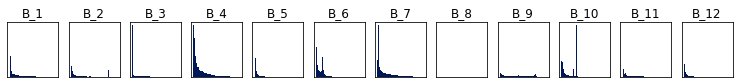

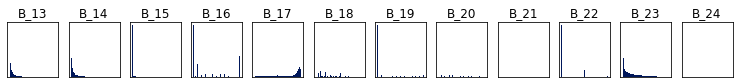

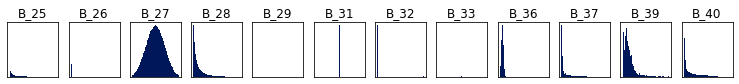

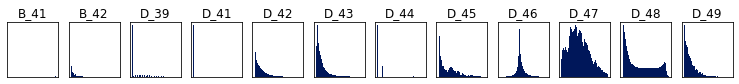

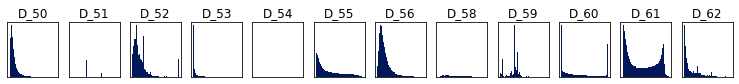

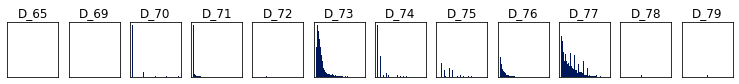

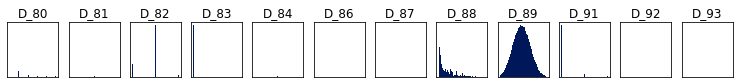

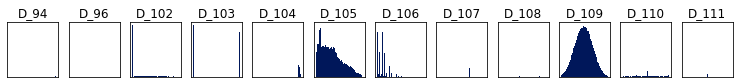

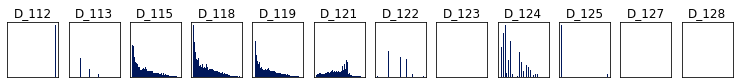

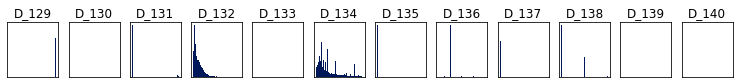

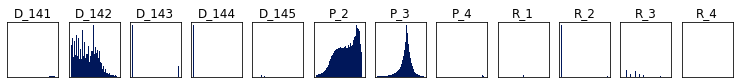

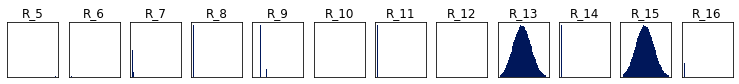

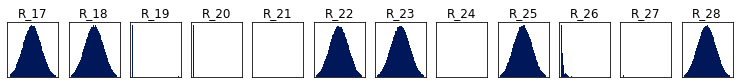

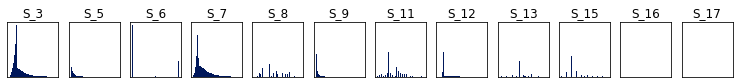

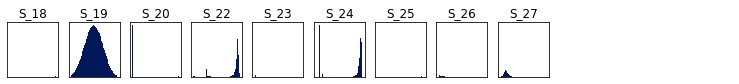

In [40]:
subplot_rows(
    num_cols=12, plot_function=quick_hist, cols=numeric_features,
    bin_calc=100, df=train_df, group_by='customer_ID', aggregate=np.median,
    density=False, color_cycle=cycle([PALETTE[0]])
)

Plot histograms again on a logarithmic scale.

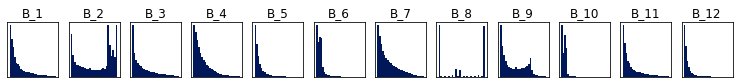

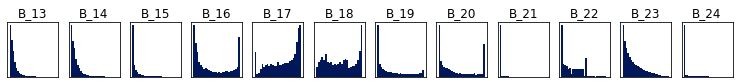

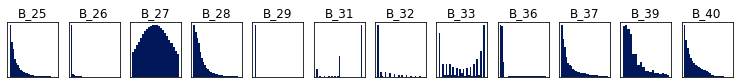

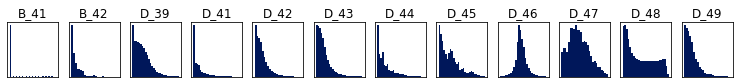

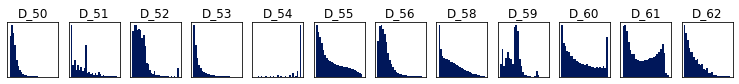

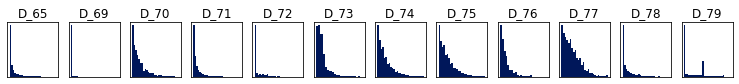

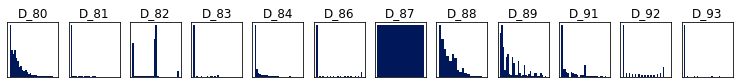

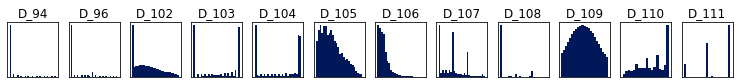

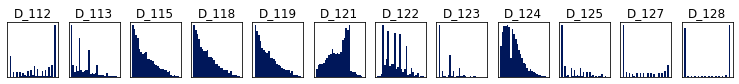

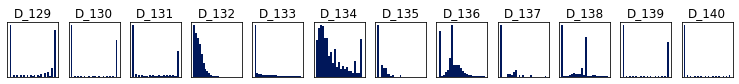

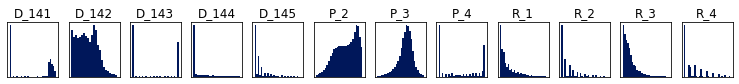

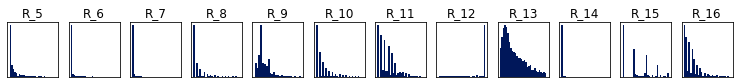

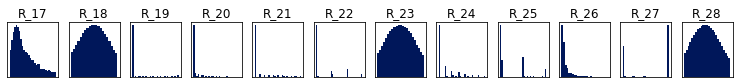

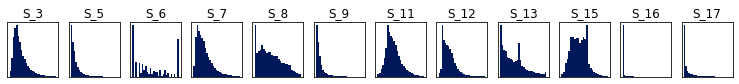

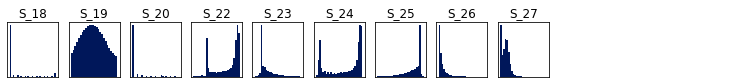

In [41]:
subplot_rows(
    num_cols=12, plot_function=quick_hist, cols=numeric_features,
    df=train_df, y_scale='symlog', group_by='customer_ID', 
    color_cycle=cycle([PALETTE[0]])
)

Many of the images shown above are consistent with Wald (inverse Gaussian), log-normal, skewed normal, or asymptotic distributions. Some distributions appear to be multimodal. Quantization bias and binning bias likely influence the appearance of many features. Roughly half of the features visualized above appear compatible with quantile and/or power transformations.

#### 4.3.3. Calculate null percentage

Generate a null percentage report. The value listed per feature represents the percentage of all measured individuals in train_data that have no non-null values for that particular feature.

While iterating through train_features to calculate this percentage, calculate the null correlation with target feature for any feature with null values. Print a list of features with any null values sorted by null percentage in descending order.

In [230]:
add_null_corr = 'add null correlation with target' not in train_features.log
flagged_numeric = []
null_report = sorted([
    (feature, details['null percent']) 
    for feature, details in train_features.data.items()
], key=lambda t: t[1], reverse=True)
for i in range(len(null_report)):
    feature, n = null_report[i]
    if n != 0:
        if add_null_corr:
            train_features.data[feature]['null correlation with target'] = (
                is_null_corr(feature, 'customer_ID')
            )
        if n > 0.03:
            if train_features.data[feature]['f_type'] == 'numeric':
                flagged_numeric.append(feature)
        if round(100 * n, 2) == 0:
            n = '< 0.01'
        else:
            n = f'{100*n:.2f}'
    else:
        n = '0.00'
    null_report[i] = f'{feature.ljust(6)}{n.rjust(7)}'
if add_null_corr:
    train_features.add_to_log('add null correlation with target')
    train_features.save
print_table([_ for _ in null_report if not _.endswith('0.00')], 
            title='null percentage by feature')

null percentage by feature
-------------------------------------------------------------------
D_87    99.82  |  D_88    99.47  |  D_110   99.11  |  D_111   99.11
B_42    98.58  |  D_73    98.26  |  D_108   95.44  |  D_134   92.47
D_136   92.47  |  D_137   92.47  |  D_138   92.47  |  B_29    91.98
R_26    88.83  |  D_76    87.81  |  D_66    86.97  |  D_106   86.59
D_49    86.57  |  D_142   81.35  |  D_42    75.26  |  D_82    73.09
D_50    54.26  |  D_105   48.39  |  D_56    46.70  |  B_17    46.51
D_43    22.46  |  D_77    19.76  |  D_46    17.43  |  S_27    14.32
S_7     12.33  |  D_62     6.61  |  D_48     6.28  |  R_27     5.88
D_61     4.59  |  D_44     3.83  |  D_78     3.83  |  D_91     2.79
D_68     1.14  |  D_69     1.04  |  D_83     1.04  |  D_114    1.03
D_117    1.03  |  D_120    1.03  |  D_113    1.03  |  D_115    1.03
D_119    1.03  |  D_121    1.03  |  D_122    1.03  |  D_123    1.03
D_125    1.03  |  D_70     0.90  |  D_59     0.83  |  B_8      0.65
D_104    0.55  |  D_1

Splitting categorical features into subfeatures inherently handles missing values. Add flags to numeric features with a null percentage higher than 3. Subsequent steps will determine how to impute missing values or drop these features after extracting any useful information from them.<br><br>

Generate a list of features with more than 30% null values where null may be correlated with the target feature. These features may be more useful following a boolean transfromation using an is null function. Add this flag to train_features and print the list of features, correlation coefficients, and null percentages.

In [282]:
null_corr_report = [
    (feature, details["null correlation with target"], 100*details["null percent"])
    for feature, details in train_features.data.items()
    if details['f_type'] == 'numeric' and details['null percent'] > 0
]
null_corr_report.sort(key=lambda t: abs(t[1]), reverse=True)
replace_with_isnull = []
analyze_and_drop = []
for feature, null_corr_w_target, null_pct in null_corr_report:
    if null_pct >= 30 and abs(null_corr_w_target) > 0.1:
        replace_with_isnull.append(feature)
    elif null_pct > 60:
        analyze_and_drop.append(feature)
print('features to replace with isnull:\n' + hr("-",30)
      + 'feature'.ljust(10) + 'isnull r'.rjust(10) + 'null %'.rjust(10))
for feature, null_corr, null_pct in null_corr_report:
    if feature in replace_with_isnull:
        print(f'{feature}:'.ljust(10) + f'{null_corr:.3f}'.rjust(10)
              + f'{null_pct:.2f}'.rjust(10))
if 'add null transform flags' not in train_features.log:
    for feature in replace_with_isnull:
        if 'flags' not in train_features.data[feature]:
            train_features.data[feature]['flags'] = ['consider isnull transform']
        else:
            train_features.data[feature]['flags'].append('consider isnull transform')
    train_features.add_to_log('add null transform flags')
    train_features.save

features to replace with isnull:
------------------------------
feature     isnull r    null %
B_17:         -0.341     46.51
D_53:         -0.322     68.61
D_42:         -0.292     75.26
R_26:         -0.267     88.83
D_106:        -0.261     86.59
D_132:        -0.260     86.57
D_49:         -0.260     86.57
R_9:          -0.229     91.38
D_135:        -0.216     92.47
D_134:        -0.216     92.47
D_136:        -0.216     92.47
D_137:        -0.216     92.47
D_138:        -0.216     92.47
D_56:          0.213     46.70
D_50:          0.140     54.26
D_76:          0.131     87.81
D_142:        -0.122     81.35
D_105:        -0.117     48.39


Apply null percentage flags for all features with 3% or more missing values.

In [43]:
if 'add null flags' not in train_features.log:
    for feature in flagged_numeric:
        train_features.data[feature]['flags'] = ['null percent']
    train_features.add_to_log('add null flags')
    train_features.save

#### 4.3.4. Approximate feature height

Calculate median data height per feature; approximate the number of measurements available per feature per observed individual.

In [44]:
feature_height_report = PyProjectFile(name='feature_height_report', directory=NB_PATH)
if not feature_height_report.data:
    feature_height_medians = [
        (feature, median_data_height(feature, "customer_ID"))
        for feature in train_features.data
    ]
    feature_height_report.data = [
        f'{feature.ljust(6)}' + f'{median_height:.1f}'.rjust(8) 
        for feature, median_height in feature_height_medians
    ]
print_table(feature_height_report.data, title='median data height by feature')

median data height by feature
-----------------------------------------------------------------------
B_30      13.0  |  B_38      13.0  |  D_114     13.0  |  D_116     13.0
D_120     13.0  |  D_126     13.0  |  D_63      13.0  |  D_64      13.0
D_68      13.0  |  P_2       13.0  |  D_39      13.0  |  B_1       13.0
R_1       13.0  |  S_3       13.0  |  D_41      13.0  |  B_3       13.0
D_43      12.0  |  D_44      13.0  |  B_4       13.0  |  D_45      13.0
R_2       13.0  |  D_46      13.0  |  D_47      13.0  |  D_48      13.0
B_6       13.0  |  B_7       13.0  |  B_8       13.0  |  D_50       0.0
B_9       13.0  |  R_3       13.0  |  D_52      13.0  |  P_3       13.0
D_53       0.0  |  S_5       13.0  |  B_11      13.0  |  S_6       13.0
R_4       13.0  |  S_7       13.0  |  B_12      13.0  |  S_8       13.0
D_56       3.0  |  B_13      13.0  |  R_5       13.0  |  D_58      13.0
B_14      13.0  |  D_59      13.0  |  D_60      13.0  |  D_61      13.0
S_11      13.0  |  D_62      13.0 

#### 4.3.5. Estimate target class distinctions

Calculate the difference between the summary statistics of the target features classes for each feature as an expression of the feature's overall summary statistic. Print the 30 features with the highest relative differences.

In [132]:
central_tendency_reports = []
central_tendency_diffs = {}
central_tendency_sort = []
for feature, details in train_features.data.items():
    if details['f_type'] == 'numeric':
        summaries = {feature: details['summary']['unweighted']['by target']}
        overall = {feature: details['summary']['unweighted']['overall']}
    elif details['f_type'] == 'categorical':
        summaries = {
            subfeature: details['subfeatures'][subfeature]['summary']['by target']
            for subfeature in details['subfeatures']
        }
        overall = {
            subfeature: details['subfeatures'][subfeature]['summary']['overall']
            for subfeature in details['subfeatures']
        }
    else:
        continue
    for feature, summary in summaries.items():
        unw_report = f'{feature}'.rjust(10) + 'mean'.rjust(8) + 'median'.rjust(8)
        diff = {feature: {
            'absolute': {
                agg: (summary['no default'][agg] - summary['default'][agg])
                for agg in ['mean', 'median']
            },
            'relative': {}
        }}
        for agg in ['mean', 'median']:
            if overall[feature][agg] != 0:
                diff[feature]['relative'][agg] = (
                    diff[feature]['absolute'][agg]/overall[feature][agg]
                )
        if diff[feature]['relative']:
            avg_diff = np.mean(list(diff[feature]['relative'].values()))
            central_tendency_sort.append((feature, avg_diff))
        for t_class, aggs in summary.items():
            unw_report = (
                unw_report + '\n' + f'{t_class}'.rjust(10) 
                + f'{aggs["mean"]:.3f}'.rjust(8) + f'{aggs["median"]:.3f}'.rjust(8)
            )
        central_tendency_reports.append(unw_report.split('\n'))
        central_tendency_diffs[feature] = diff[feature]
for i in range(0, len(central_tendency_reports), 3):
    rprts = '\n'.join(
        '  '.join(report[line] for report in central_tendency_reports[i:i+3])
        for line in range(3)
    )
central_tendency_sort = sorted(
    central_tendency_sort, key=lambda t: abs(t[1]), reverse=True
)
diff_report = {}
for feature, avg_diff in central_tendency_sort:
    diff_report[feature] = {'name': feature.rjust(11)}
    for agg in 'mean median'.split():
        if agg in central_tendency_diffs[feature]['relative']:
            diff_report[feature][agg] = (
                f"{central_tendency_diffs[feature]['relative'][agg]:.2f}".rjust(11)
            )
        else:
            diff_report[feature][agg] = '--'.rjust(11)
print('summary statistics\nrelative class difference by feature\n'
      + '\t= (no default - default) / overall\n' + hr('_'))
for i in range(0, len(central_tendency_sort[:30]), 6):
    ftrs = [_[0] for _ in central_tendency_sort[i: i+6]]
    print('feature'.ljust(10) + ''.join(diff_report[ftr]['name'] for ftr in ftrs))
    print(hr('-', newline=False))
    for agg in ['mean', 'median']:
        print(f'{agg}'.ljust(10) + ''.join(diff_report[ftr][agg] for ftr in ftrs))
    print('\n')

summary statistics
relative class difference by feature
	= (no default - default) / overall
_______________________________________________________________________________

feature           B_8      D_103      D_104       B_20      D_107       D_44
-------------------------------------------------------------------------------
mean            -0.83      -0.31      -0.31      -1.40      -0.35      -2.03
median        -110.32    -106.76    -101.52     -50.63     -35.09     -32.08


feature          B_19        B_3      D_113        B_9        R_3       B_16
-------------------------------------------------------------------------------
mean            -1.73      -1.76      -0.53      -1.66      -1.16      -1.06
median         -25.73     -21.45     -22.29     -19.40     -10.53      -7.32


feature          B_11      D_102        B_1       B_37       B_23       B_40
-------------------------------------------------------------------------------
mean            -1.60      -0.07      -1.54 

#### 4.4. Sort features by target correlation

Print a list of the top 20 features by correlation with the target feature.

In [287]:
print('top features by correlation with target\n')
print('feature'.ljust(8) + 'r'.rjust(11).ljust(20) + 'ID aggregate\n'
      + hr(newline=False))
for feature, agg_details in numeric_feat_by_corr[:20]:
    a_name, a_value = agg_details
    if abs(a_value) < 0.3:
        break
    print(f'{feature}'.ljust(8) + f'{a_value:.4f}'.rjust(11).ljust(20) 
          + f'{a_name}')
    

top features by correlation with target

feature           r         ID aggregate
P_2         -0.6670         last
D_48         0.6122         last
B_2         -0.5577         last
R_1          0.5569         max
B_18        -0.5463         last
B_9          0.5406         last
D_61         0.5372         last
D_44         0.5277         last
D_55         0.5270         last
B_3          0.5068         last
B_7          0.5019         last
D_75         0.4998         last
D_58         0.4989         last
B_23         0.4952         last
B_16         0.4690         last
B_4          0.4621         last
D_74         0.4605         last
B_20         0.4597         last
R_10         0.4589         delta_max
B_22         0.4532         max


#### 4.5. Compare train and test data

Visualize feature distributions. Assert distribution types are consistent between train and test data.<br><br>
Use histograms to compare the feature distributions between the labeled data to be used in modelling and the unlabeled data to be used in rendering predictions. Any significant differences will inform feature selection. <br><br>

Plot distributions. Areas in blue and yellow represent discrepancies between the distributions of the provided train and test data.

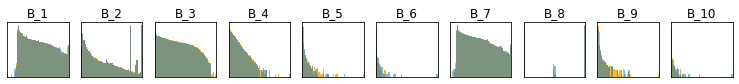

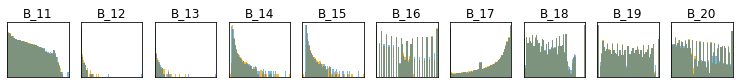

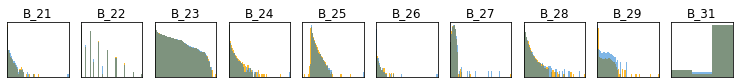

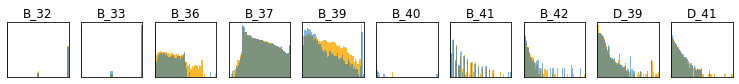

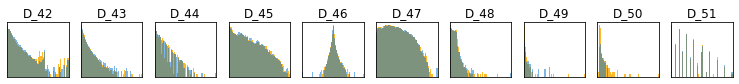

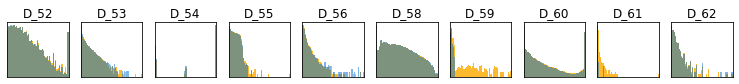

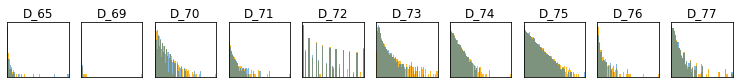

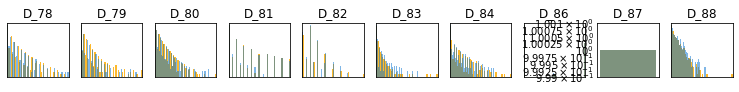

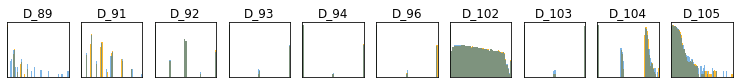

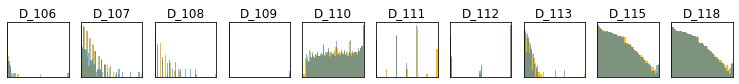

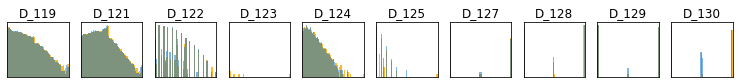

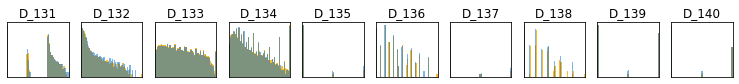

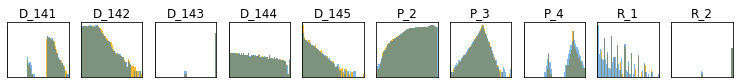

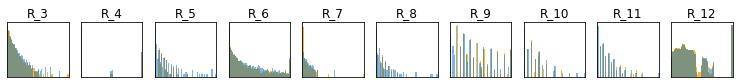

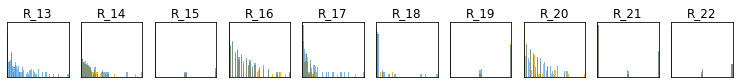

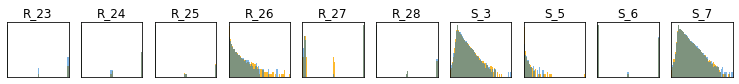

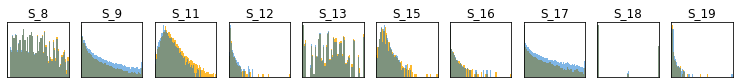

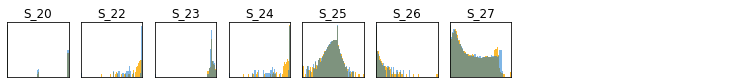

In [46]:
subplot_rows(
    cols=numeric_features, num_cols=10, figsize=(13,1), 
    plot_function=compare_weighted_dist, bins='doane'
    df_a=train_df, df_b=test_df, id_col='customer_ID',
    agg=np.median, density=True, y_offset=0, log=True
)

Feature distributions are largely similar between the train and test data. Notable exceptions include features D_59, D_61 and B_36, and B_39. Add flags for these features.

In [47]:
if 'add distribution mismatch flags' not in train_features.log:
    for feature in ['D_59', 'D_61', 'B_36', 'B_39']:
        if 'flags' not in train_features.data[feature]:
            train_features.data[feature]['flags'] = []
        if 'train/test distribution mismatch' not in (
                train_features.data[feature]['flags']
        ):
            train_features.data[feature]['flags'].append('train/test distribution mismatch')
    train_features.add_to_log('add distribution mismatch flags')
    train_features.save

#### 4.6. Calculate percentiles and standard deviation

For numeric features, calculate the unweighted overall standard deviation. Calculate a range of percentiles for each feature. These may used for outlier detection in subsequent notebooks.

In [289]:
if 'add percentiles and standard deviation' not in train_features.log:
    for feature, details in train_features.data.items():
        if details['f_type'] == 'numeric':
            unw_ov_std = train_df[feature].std()
            unweighted_percentiles = col_percentiles(
                feature, id_col='customer_ID', percentiles=[1, 5, 25, 50, 75, 95, 99]
            )
            train_features.data[feature]['summary']['unweighted']['overall']['std'] = unw_ov_std
            train_features.data[feature]['summary']['unweighted']['overall']['percentiles'] = (
                unweighted_percentiles
            )
    train_features.add_to_log('add percentiles and standard deviation')
    train_features.save

#### 4.7 Print feature summaries

In [302]:
print_feature_summary(train_features)

B_30
_______________________________________________________________________________
category:balance
feature type: categorical
data type: float64
null percent: 0.01
...............................................................................

isnull correlation with target:    -0.001

    subfeature B_30_0
    ---------------------------------------------------------------------------

    summary statistics:
    {'by target': {'default': {'max': 1.0,
                               'mean': 0.6491262830621253,
                               'median': 0.7692307692307693,
                               'min': 0.0},
                   'no default': {'max': 1.0,
                                  'mean': 0.9274292892107473,
                                  'median': 1.0,
                                  'min': 0.0}},
     'overall': {'max': 1.0,
                 'mean': 0.8553672870127913,
                 'median': 1.0,
                 'min': 0.0}}

    subfeature B_30_1
    --------

span:        -0.1095
count:       -0.1035
delta_max:   -0.0760
delta_min:    0.0724
range:       -0.0624
max:         -0.0564
sum:         -0.0474
mean:        -0.0471
last:        -0.0457
first:       -0.0375
min:         -0.0259
delta_mean:  -0.0100
delta_pd:    -0.0078
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 


D_102
_______________________________________________________________________________
category:delinquency
feature type: numeric
data type: float64
null percent: 0.00
...............................................................................

summary statistics:

          no default       default       overall
min           0.0000        0.0000        0.0000
max           1.0900        1.0900        1.0900
mean          0.1867        0.1994        0.1898
median        0.0084        0.0659        0.0089

target correlation by aggregate:

span:        -0.1152
count:       -0.1107
delta_max:    0.0516
delta_mean:   0.0266
last:        

In [305]:
train_features.save;